# Multiple Linear Regression

### Objectives
After completing this lab, you will be able to:
- Use scikit-learn to implement multiple linear regression
- Create, train, and test a multiple linear regression model on real data

# Import Library

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Load the data 

In [36]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [37]:
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
564,2014,JAGUAR,XK COUPE,MINICOMPACT,5.0,8,AS6,Z,14.8,9.9,12.6,22,290
849,2014,NISSAN,MURANO AWD,SUV - SMALL,3.5,6,AV,X,13.2,10.1,11.8,24,271
55,2014,AUDI,S4,COMPACT,3.0,6,A7,Z,13.2,9.2,11.4,25,262
841,2014,NISSAN,FRONTIER,PICKUP TRUCK - SMALL,4.0,6,A5,X,14.7,10.2,12.7,22,292
109,2014,BMW,740Li xDRIVE,FULL-SIZE,3.0,6,A8,Z,12.5,8.6,10.7,26,246


### FuelConsumption.csv:
##### You will download and use a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source

- MODEL YEAR e.g. 2014
- MAKE e.g. VOLVO
- MODEL e.g. S60 AWD
- VEHICLE CLASS e.g. COMPACT
- ENGINE SIZE e.g. 3.0
- CYLINDERS e.g 6
- TRANSMISSION e.g. AS6
- FUEL TYPE e.g. Z
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5
- FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
- FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
- CO2 EMISSIONS (g/km) e.g. 182
#### Your task will be to create a multiple linear regression model using some of these features to predict CO2 emissions of unobserved cars based on the selected features.

# Explore and select features

In [38]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Notice that some of the variables are not included in the description. This is because they aren't numerical. In practice, you would analyze these features if required to improve the accuracy of your model. In the interest of time, you can omit this step here.

Notice also that MODELYEAR is the same for all cars, so you can drop these variables for this modeling illustration.

In [39]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

Now that you have eliminated some features, take a look at the relationships among the remaining features.

Analyzing a correlation matrix that displays the pairwise correlations between all features indicates the level of independence between them.

It also indicates how predictive each feature is of the target.

You want to eliminate any strong dependencies or correlations between features by selecting the best one from each correlated group.

In [40]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Look at the bottom row, which shows the correlation between each variable and the target, 'CO2EMISSIONS'. Each of these shows a fairly high level of correlation, each exceeding 85% in magnitude. Thus all of these features are good candidates.

Next, examine the correlations of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, you can drop the others: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.'

Notice that FUELCONSUMPTION_COMB and FUELCONSUMPTION_COMB_MPG are not perfectly correlated. They should be, though, because they measure the same property in different units. In practice, you would investigate why this is the case. You might find out that some or all of the data is not useable as is.

In [41]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [42]:
print(df.head())

   ENGINESIZE  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
0         2.0                        33           196
1         2.4                        29           221
2         1.5                        48           136
3         3.5                        25           255
4         3.5                        27           244


To help with selecting predictive features that are not redundant, consider the following scatter matrix, which shows the scatter plots for each pair of input features. The diagonal of the matrix shows each feature's histogram.

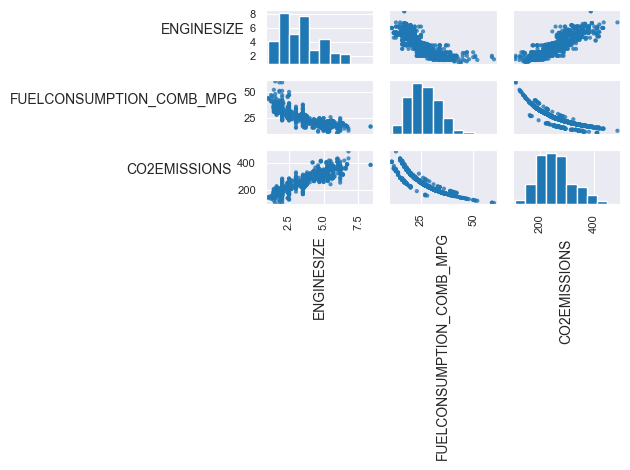

In [43]:
axes = pd.plotting.scatter_matrix(df, alpha=.8)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
# plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

As you can see, the relationship between 'FUELCONSUMPTION_COMB_MPG' and 'CO2EMISSIONS' is non-linear. In addition, you can clearly see three different curves. This suggests exploring the categorical variables to see if they are able to explain these differences. Let's leave this as an exercise for you to explore deeper. Regarding the non-linearity, you will handle this in the next lab. For now, let's just consider through modeling whether fuel economy explains some of the variances in the target as is.

# Extract the input features and labels from the data set

In [44]:
# X = df.iloc[:,[0,1]].to_numpy()
# y = df.iloc[:,[2]].to_numpy()
X = df[["ENGINESIZE", "FUELCONSUMPTION_COMB_MPG"]].to_numpy()
y = df[["CO2EMISSIONS"]].to_numpy()

# Preprocess selected features by StandardScaler

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [46]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


### As you can see, a standardized variable has zero mean and a standard deviation of one.

# Create train and test datasets

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Build a multiple linear regression model

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# GET THE COEFFIENT AND 
coef_ = model.coef_
intercept_ = model.intercept_
print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [53]:
# The Coefficients and Intercept parameters define the best-fit hyperplane to the data. Since there are only two variables, hence two parameters, the hyperplane is a plane. But this best-fit plane will look different in the original, unstandardized feature space.
# 
# You can transform your model's parameters back to the original space prior to standardization as follows. This gives you a proper sense of what they mean in terms of your original input features. Without these adjustments, the model's outputs would be tied to an abstract, transformed space that doesn’t align with the actual independent variables and the real-world problem you’re solving.

In [58]:
# Get the standard scaler's mean and standard deviation parameters
std_mean = scaler.mean_
std_devs_ = np.sqrt(scaler.var_)

In [61]:
# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((std_mean * coef_) / std_devs_)

print ('Coefficients: ',coef_original)
print ('Intercept: ',intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


# Visualize model outputs

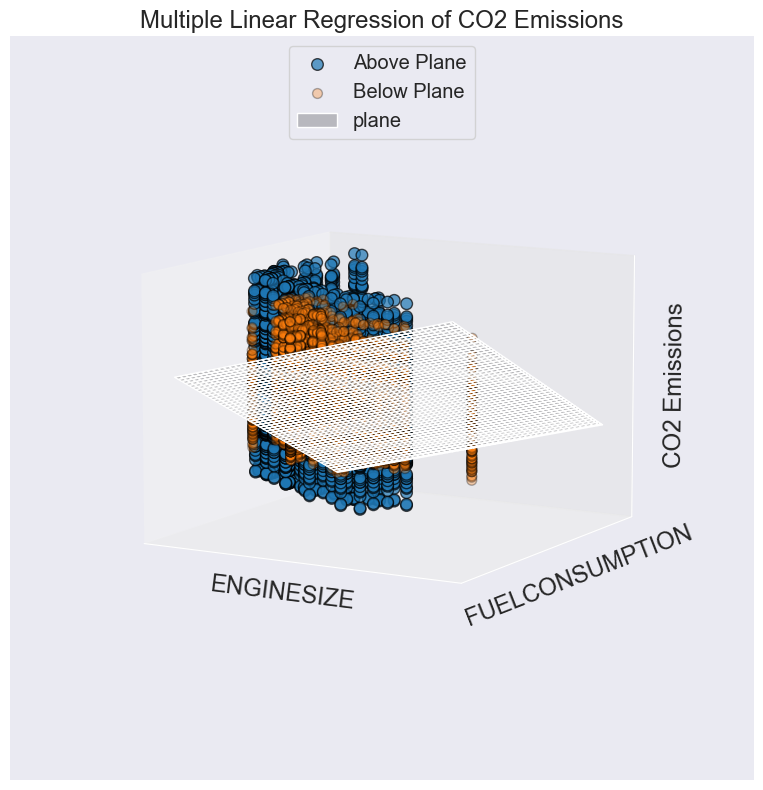

In [63]:
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = model.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else model.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()